**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [ ]:
main_objectives ='''unticipate who is likely to leave, and what is causing them to leave. This might help keep the good emlployees
'''

In [ ]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [ ]:
dm_outline = '''I will perform EDA, try and find out the similarities and what is unique from this two tables. 
i would perfom feature selection and plot a box plot
'''

In [ ]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$



Why do you choose these metrics? minimum of 100 characters

In [ ]:
why_metrics = '''it is known as a confusion metrix and it describes the complete performance of the model
'''

In [ ]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [ ]:
how_success = '''I will treat the current employee table as a train set and input a new record to test and
the employee who left as the validation table because they have are truely gone.I will calulate the score afterwards 
'''

In [ ]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [ ]:
challenge_text = '''1.
'''

In [ ]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [1]:
import pandas as pd
import numpy as np
import sys
import tweepy
import os
import nltk
import pycountry
import re
import string
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load
from scipy.sparse import save_npz, load_npz
from sklearn.decomposition import NMF, LatentDirichletAllocation
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [3]:
tweets = pd.read_csv('processed.csv')
tweets.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth:🚨Africa is ""in the midst o...",0.000000,0.000000,en,548,612.0,ketuesriche,551,351,NaN,NaN,NaN,Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,NaN,NaN,"Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,NaN,NaN,NaN
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,1580,899.0,RIPNY08,2666,2704,NaN,NaN,NaN,NaN
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,72,20.0,pash22,28250,30819,NaN,NaN,NaN,United Kingdom


In [4]:
tweets.drop_duplicates(inplace = True)

In [5]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features



tw_list = pd.DataFrame(tweets)
tw_list["text"] = tw_list["original_text"]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ', "", x)
rt = lambda x: re.sub("[^0-9A-Za-z@]|(@[A-Za-z0–9]+)|(\w+:\/\/\S+)", " ", x)
tw_list["text"] = tw_list['text'].map(remove_rt).map(rt)
tw_list["text"] = tw_list['text'].str.lower()
tw_list['text'].head(10)


0    rt    africa is  in the midst of a full blown ...
1    dr moeti is head of who in africa  and one of ...
2    thank you  2note for creating this amazing cam...
3    former pfizer vp and virologist  dr  michael y...
4    i think it s important that we don t sell cova...
5    i m pleased to welcome the  wecandothis bus to...
6    yet another amazingly qualified and courageous...
7    yet another amazingly qualified and courageous...
8    dr moeti is head of who in africa  and one of ...
9    it is really something to see new research com...
Name: text, dtype: object

In [6]:
clean_tweet= ["text","polarity"]
tw_list[clean_tweet].head()


,text,polarity
0,rt africa is in the midst of a full blown ...,0.000000
1,dr moeti is head of who in africa and one of ...,0.133333
2,thank you 2note for creating this amazing cam...,0.316667
3,former pfizer vp and virologist dr michael y...,0.166667
4,i think it s important that we don t sell cova...,0.300000


In [7]:
CleanTweets = tw_list[clean_tweet]
CleanTweets.head()

,text,polarity
0,rt africa is in the midst of a full blown ...,0.000000
1,dr moeti is head of who in africa and one of ...,0.133333
2,thank you 2note for creating this amazing cam...,0.316667
3,former pfizer vp and virologist dr michael y...,0.166667
4,i think it s important that we don t sell cova...,0.300000


In [8]:
CleanTweets["polarity"].describe()

count    6532.000000
mean        0.041399
std         0.323983
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.175000
max         1.000000
Name: polarity, dtype: float64

In [9]:
'''#Calculating Negative, Positive, Neutral and Compound values
tw_list[[‘polarity’, ‘subjectivity’]] = tw_list[‘text’].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list[‘text’].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score[‘neg’]
 neu = score[‘neu’]
 pos = score[‘pos’]
 comp = score[‘compound’]
 if neg > pos:
 tw_list.loc[index, ‘sentiment’] = “negative”
 elif pos > neg:
 tw_list.loc[index, ‘sentiment’] = “positive”
 else:
 tw_list.loc[index, ‘sentiment’] = “neutral”
 tw_list.loc[index, ‘neg’] = neg
 tw_list.loc[index, ‘neu’] = neu
 tw_list.loc[index, ‘pos’] = pos
 tw_list.loc[index, ‘compound’] = comp'''

def text_category (p):
    if(p > 0):
        return "positive"
    elif(p < 0):
        return "negative"  
    elif(p==0):
        return "neutral"  


In [10]:
#CleanTweets["polarity"] = pd.to_numeric(CleanTweets["polarity"])
#CleanTweets['score'] =CleanTweets['polarity'].apply(text_category)
#CleanTweets= CleanTweets.astype({"polarity":'float'})
#CleanTweets.astype({'polarity': 'float'}).dtypes
#CleanTweets['polarity'] = CleanTweets.polarity.astype(float)
#CleanTweets["polarity"]= CleanTweets["polarity"].astype(float)
#pd.to_numeric(CleanTweets.polarity)
CleanTweets["polarity"]=pd.to_numeric(CleanTweets["polarity"], errors='coerce')

<ipython-input-10-c8e0c6b4c12e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanTweets["polarity"]=pd.to_numeric(CleanTweets["polarity"], errors='coerce')


In [18]:
CleanTweets['score'] = CleanTweets['polarity'].apply(text_category)

count_values_in_column(CleanTweets,"score")

<ipython-input-18-ce130f723c9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanTweets['score'] = CleanTweets['polarity'].apply(text_category)


,Total,Percentage
positive,2808,42.99
neutral,2508,38.40
negative,1216,18.62


In [100]:
CleanTweets.head(10000)

,text,polarity,score,punct,tokenized,nonstop,stemmed
0,rt africa is in the midst of a full blown ...,0.000000,neutral,rt africa is in the midst of a full blown ...,"[rt, africa, is, in, the, midst, of, a, full, ...","[rt, africa, midst, full, blown, third, wave, ...","[rt, africa, midst, full, blown, third, wave, ..."
1,dr moeti is head of who in africa and one of ...,0.133333,positive,dr moeti is head of who in africa and one of ...,"[dr, moeti, is, head, of, who, in, africa, and...","[dr, moeti, head, africa, one, best, public, h...","[dr, moeti, head, africa, one, best, public, h..."
2,thank you 2note for creating this amazing cam...,0.316667,positive,thank you 2note for creating this amazing cam...,"[thank, you, 2note, for, creating, this, amazi...","[thank, 2note, creating, amazing, campaign, am...","[thank, 2note, creat, amaz, campaign, amp, tur..."
3,former pfizer vp and virologist dr michael y...,0.166667,positive,former pfizer vp and virologist dr michael y...,"[former, pfizer, vp, and, virologist, dr, mich...","[former, pfizer, vp, virologist, dr, michael, ...","[former, pfizer, vp, virologist, dr, michael, ..."
4,i think it s important that we don t sell cova...,0.300000,positive,i think it s important that we don t sell cova...,"[i, think, it, s, important, that, we, don, t,...","[think, important, sell, covax, short, still, ...","[think, import, sell, covax, short, still, lot..."
...,...,...,...,...,...,...,...
6527,zweli please just release the graphic designer...,0.000000,neutral,zweli please just release the graphic designer...,"[zweli, please, just, release, the, graphic, d...","[zweli, please, release, graphic, designers, f...","[zweli, pleas, releas, graphic, design, firewo..."
6528,former pfizer vp and virologist dr michael y...,0.166667,positive,former pfizer vp and virologist dr michael y...,"[former, pfizer, vp, and, virologist, dr, mich...","[former, pfizer, vp, virologist, dr, michael, ...","[former, pfizer, vp, virologist, dr, michael, ..."
6529,73 respectfully veterinarians have to have...,0.281250,positive,73 respectfully veterinarians have to have...,"[, 73, respectfully, veterinarians, have, to, ...","[, 73, respectfully, veterinarians, broad, kno...","[, 73, respect, veterinarian, broad, knowledg,..."
6530,africa needs millions more doses here amp n...,0.166667,positive,africa needs millions more doses here amp n...,"[, africa, needs, millions, more, doses, here,...","[, africa, needs, millions, doses, amp, curb, ...","[, africa, need, million, dose, amp, curb, thi..."


In [85]:
#Creating new data frames for all sentiments (positive, negative and neutral)
CleanTweets_negative = CleanTweets[CleanTweets["score"]=="negative"]
CleanTweets_positive = CleanTweets[CleanTweets["score"]=="positive"]
CleanTweets_neutral = CleanTweets[CleanTweets["score"]=="neutral"] 

In [ ]:
clean_tweet= ["text","polarity"]
tw_list[clean_tweet].head()

CleanTweets = tw_list[clean_tweet]
CleanTweets.head()

In [15]:
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2) 
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(CleanTweets,"score")

,Total,Percentage
positive,2808,42.99
neutral,2508,38.40
negative,1216,18.62


<AxesSubplot:>

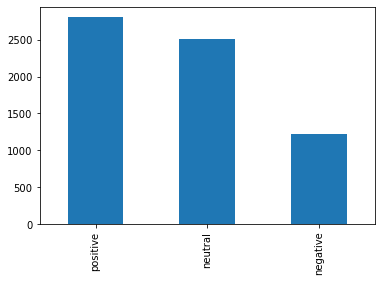

In [16]:
CleanTweets['score'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='score'>

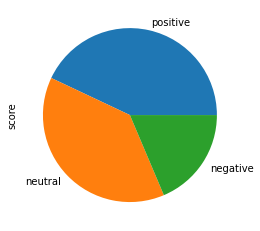

In [17]:

CleanTweets['score'].value_counts().plot(kind='pie')


In [58]:
def create_wordcloud(msgs):
    stopwords = set(STOPWORDS)
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=5000,
                      colormap='tab20c',
                      stopwords=stopwords,
                      collocations=True).generate_from_text(msgs)
    plt.figure(figsize=(20,12))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(); plt.title('most used words', size=20)
    plt.savefig('masked_wordcloud.jpg')
    plt.show()

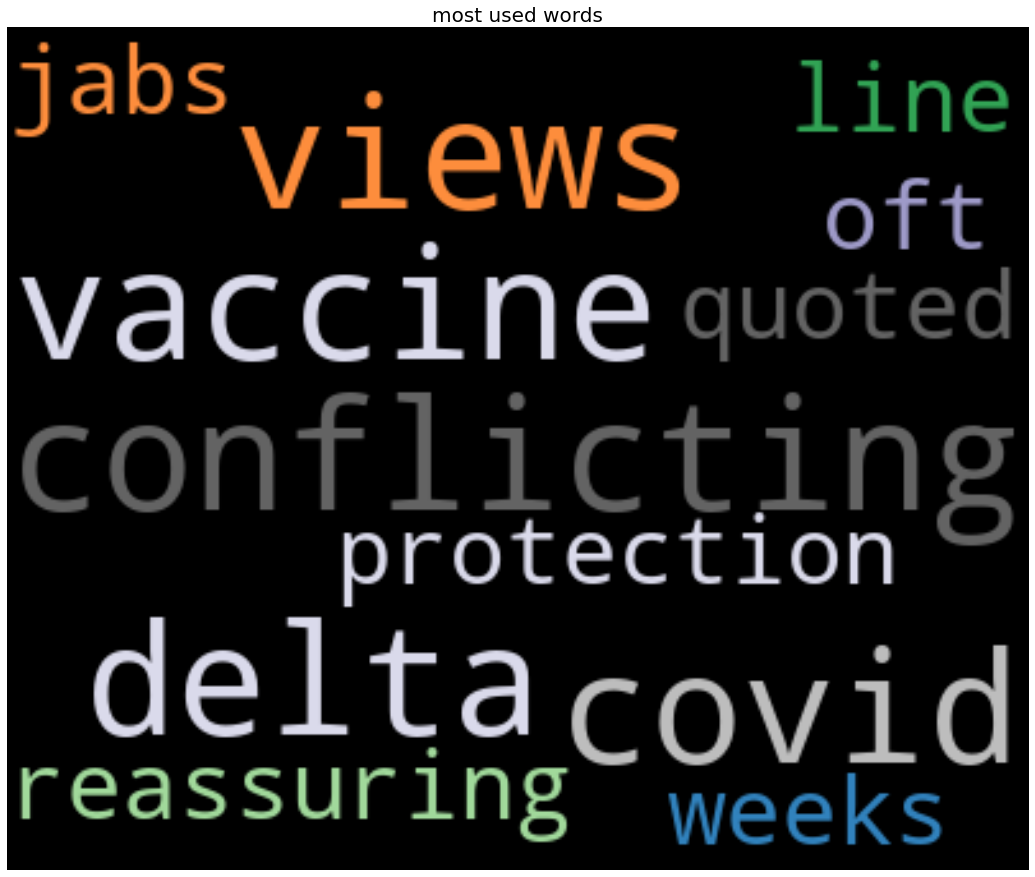

In [104]:
create_wordcloud(CleanTweets.text[1000])

In [86]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
CleanTweets['punct'] = CleanTweets['text'].apply(lambda x: remove_punct(x))
CleanTweets.head()

<ipython-input-86-4ab906926bc7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanTweets['punct'] = CleanTweets['text'].apply(lambda x: remove_punct(x))


,text,polarity,score,punct
0,rt africa is in the midst of a full blown ...,0.000000,neutral,rt africa is in the midst of a full blown ...
1,dr moeti is head of who in africa and one of ...,0.133333,positive,dr moeti is head of who in africa and one of ...
2,thank you 2note for creating this amazing cam...,0.316667,positive,thank you 2note for creating this amazing cam...
3,former pfizer vp and virologist dr michael y...,0.166667,positive,former pfizer vp and virologist dr michael y...
4,i think it s important that we don t sell cova...,0.300000,positive,i think it s important that we don t sell cova...


In [87]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
CleanTweets['tokenized'] = CleanTweets['punct'].apply(lambda x: tokenization(x.lower()))
CleanTweets.head()

<ipython-input-87-70e495294769>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanTweets['tokenized'] = CleanTweets['punct'].apply(lambda x: tokenization(x.lower()))


,text,polarity,score,punct,tokenized
0,rt africa is in the midst of a full blown ...,0.000000,neutral,rt africa is in the midst of a full blown ...,"[rt, africa, is, in, the, midst, of, a, full, ..."
1,dr moeti is head of who in africa and one of ...,0.133333,positive,dr moeti is head of who in africa and one of ...,"[dr, moeti, is, head, of, who, in, africa, and..."
2,thank you 2note for creating this amazing cam...,0.316667,positive,thank you 2note for creating this amazing cam...,"[thank, you, 2note, for, creating, this, amazi..."
3,former pfizer vp and virologist dr michael y...,0.166667,positive,former pfizer vp and virologist dr michael y...,"[former, pfizer, vp, and, virologist, dr, mich..."
4,i think it s important that we don t sell cova...,0.300000,positive,i think it s important that we don t sell cova...,"[i, think, it, s, important, that, we, don, t,..."


In [88]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
CleanTweets['nonstop'] = CleanTweets['tokenized'].apply(lambda x: remove_stopwords(x))
CleanTweets.head()

<ipython-input-88-07543d8b5b27>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanTweets['nonstop'] = CleanTweets['tokenized'].apply(lambda x: remove_stopwords(x))


,text,polarity,score,punct,tokenized,nonstop
0,rt africa is in the midst of a full blown ...,0.000000,neutral,rt africa is in the midst of a full blown ...,"[rt, africa, is, in, the, midst, of, a, full, ...","[rt, africa, midst, full, blown, third, wave, ..."
1,dr moeti is head of who in africa and one of ...,0.133333,positive,dr moeti is head of who in africa and one of ...,"[dr, moeti, is, head, of, who, in, africa, and...","[dr, moeti, head, africa, one, best, public, h..."
2,thank you 2note for creating this amazing cam...,0.316667,positive,thank you 2note for creating this amazing cam...,"[thank, you, 2note, for, creating, this, amazi...","[thank, 2note, creating, amazing, campaign, am..."
3,former pfizer vp and virologist dr michael y...,0.166667,positive,former pfizer vp and virologist dr michael y...,"[former, pfizer, vp, and, virologist, dr, mich...","[former, pfizer, vp, virologist, dr, michael, ..."
4,i think it s important that we don t sell cova...,0.300000,positive,i think it s important that we don t sell cova...,"[i, think, it, s, important, that, we, don, t,...","[think, important, sell, covax, short, still, ..."


In [89]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
CleanTweets['stemmed'] = CleanTweets['nonstop'].apply(lambda x: stemming(x))
CleanTweets.head()

<ipython-input-89-328fcdf320c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanTweets['stemmed'] = CleanTweets['nonstop'].apply(lambda x: stemming(x))


,text,polarity,score,punct,tokenized,nonstop,stemmed
0,rt africa is in the midst of a full blown ...,0.000000,neutral,rt africa is in the midst of a full blown ...,"[rt, africa, is, in, the, midst, of, a, full, ...","[rt, africa, midst, full, blown, third, wave, ...","[rt, africa, midst, full, blown, third, wave, ..."
1,dr moeti is head of who in africa and one of ...,0.133333,positive,dr moeti is head of who in africa and one of ...,"[dr, moeti, is, head, of, who, in, africa, and...","[dr, moeti, head, africa, one, best, public, h...","[dr, moeti, head, africa, one, best, public, h..."
2,thank you 2note for creating this amazing cam...,0.316667,positive,thank you 2note for creating this amazing cam...,"[thank, you, 2note, for, creating, this, amazi...","[thank, 2note, creating, amazing, campaign, am...","[thank, 2note, creat, amaz, campaign, amp, tur..."
3,former pfizer vp and virologist dr michael y...,0.166667,positive,former pfizer vp and virologist dr michael y...,"[former, pfizer, vp, and, virologist, dr, mich...","[former, pfizer, vp, virologist, dr, michael, ...","[former, pfizer, vp, virologist, dr, michael, ..."
4,i think it s important that we don t sell cova...,0.300000,positive,i think it s important that we don t sell cova...,"[i, think, it, s, important, that, we, don, t,...","[think, important, sell, covax, short, still, ...","[think, import, sell, covax, short, still, lot..."


In [90]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [91]:
CleanTweets.head()

,text,polarity,score,punct,tokenized,nonstop,stemmed
0,rt africa is in the midst of a full blown ...,0.000000,neutral,rt africa is in the midst of a full blown ...,"[rt, africa, is, in, the, midst, of, a, full, ...","[rt, africa, midst, full, blown, third, wave, ...","[rt, africa, midst, full, blown, third, wave, ..."
1,dr moeti is head of who in africa and one of ...,0.133333,positive,dr moeti is head of who in africa and one of ...,"[dr, moeti, is, head, of, who, in, africa, and...","[dr, moeti, head, africa, one, best, public, h...","[dr, moeti, head, africa, one, best, public, h..."
2,thank you 2note for creating this amazing cam...,0.316667,positive,thank you 2note for creating this amazing cam...,"[thank, you, 2note, for, creating, this, amazi...","[thank, 2note, creating, amazing, campaign, am...","[thank, 2note, creat, amaz, campaign, amp, tur..."
3,former pfizer vp and virologist dr michael y...,0.166667,positive,former pfizer vp and virologist dr michael y...,"[former, pfizer, vp, and, virologist, dr, mich...","[former, pfizer, vp, virologist, dr, michael, ...","[former, pfizer, vp, virologist, dr, michael, ..."
4,i think it s important that we don t sell cova...,0.300000,positive,i think it s important that we don t sell cova...,"[i, think, it, s, important, that, we, don, t,...","[think, important, sell, covax, short, still, ...","[think, import, sell, covax, short, still, lot..."


In [92]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(CleanTweets['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

6532 Number of reviews has 3670 words


In [93]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,ab,abandon,abil,abl,abolish,abpoli,abroad,absolut,absurd,...,z,zambia,zero,zi,zimbabw,zino,zionist,zirconia,zoo,zweli
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
vaccin,4819
covid,2865
dose,1356
africa,1102
israel,957
expir,891
anoth,819
tri,728
liar,720
war,720


In [95]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(CleanTweets['text'],(2,2),20)
n2_bigrams

[('covid19 vaccines', 956),
 ('expired vaccines', 782),
 ('vaccines just', 717),
 ('war crime', 717),
 ('liars tried', 716),
 ('tried load', 716),
 ('load expired', 716),
 ('just war', 716),
 ('crime israel', 716),
 ('pin code', 545),
 ('min age', 545),
 ('age limit', 545),
 ('dose1 capacity', 545),
 ('covid19 vaccine', 416),
 ('limit 18', 397),
 ('18 45', 351),
 ('45 dose1', 351),
 ('india india', 320),
 ('africa midst', 309),
 ('midst blown', 309)]

In [96]:
#n3_trigram
n3_trigrams = get_top_n_gram(CleanTweets['text'],(3,3),20)
n3_trigrams

[('liars tried load', 716),
 ('tried load expired', 716),
 ('load expired vaccines', 716),
 ('expired vaccines just', 716),
 ('vaccines just war', 716),
 ('just war crime', 716),
 ('war crime israel', 716),
 ('min age limit', 545),
 ('age limit 18', 397),
 ('limit 18 45', 351),
 ('18 45 dose1', 351),
 ('45 dose1 capacity', 351),
 ('africa midst blown', 309),
 ('midst blown wave', 309),
 ('covishield min age', 304),
 ('vaccines covishield min', 277),
 ('india india india', 244),
 ('covaxin min age', 241),
 ('covid19 vaccines administered', 215),
 ('vaccines covaxin min', 212)]